Import all the code. If you get import errors, review the installation proceedure. Make sure you are using the correct kernel. You will need to explicitly set up a kernel for the environment you've created. 

In [1]:
import sys

import numpy as np

from smokedetectoroptimization.constants import (ALARM_THRESHOLD, FALSE_ALARM_THRESHOLD, 
                                                 SMOOTH_PLOTS, SINGLE_OBJECTIVE_FUNCTIONS_TTA,
                                                 SINGLE_OBJECTIVE_FUNCTIONS_MC)
from smokedetectoroptimization.optimizer import (optimize, evaluate_optimization,
                                                 optimization_logger, evaluate_locations)
from smokedetectoroptimization.smoke_source import SmokeSource, smoke_logger
from smokedetectoroptimization.visualization import show_stability

In [2]:
# This is a hack, but it lets us import something from the folder above.
# I will address it at some point soon.
sys.path.append("..")
from constants import (SMOKE_FOLDERS, SMOKE_FOLDERS_LONG,
                       FALSE_ALARM_FOLDERS, FALSE_ALARM_FOLDERS_LONG,
                       NASA_DETECTORS, SOURCE_LOCATIONS)

The goal is to set the level of detail we get printed out. The smoke logger appears to be broken since it should display which directory it's loading from.

In [3]:
import logging
optimization_logger.setLevel(logging.ERROR)
smoke_logger.setLevel(logging.DEBUG)

Parameterization can be "xy", "yz", "xz", "xyz", or "phi_theta"  
Function type can be "multiobjective_competing", "multiobjective_counting", or "worst_case", which is the one we are used to. "fastest" and "second are also supported, but I would not recommend using them.  
Interplolation method can be "nearest", which takes the nearest value, or "linear" or "cubic" The later two seem to take much longer.  

In [4]:
PARAMETERIZATION = "phi_theta"
FUNCTION_TYPE = "worst_case_TTA"
INTERPOLATION_METHOD = "nearest"
NUM_DETECTORS = 2
VIS = True
RUN_EXPERIMENTS = False
LOAD_DATA = False

if LOAD_DATA:
    sources = []
    # This notation just takes the first two folders
    # This makes it much faster to evaluate the optimization
    for data_dir in SMOKE_FOLDERS_LONG:
        # create a smoke source and then get it's time to alarm with a given parameterization
        print(f"Loading {data_dir}")
        sources.append(SmokeSource(data_dir,
                                   parameterization=PARAMETERIZATION,
                                   vis=VIS,
                                   alarm_threshold=ALARM_THRESHOLD))

In [5]:
if RUN_EXPERIMENTS:
    res = evaluate_optimization(sources,
                                    num_iterations=10,
                                    visualize_summary=True)
    np.save("keys.npy", list(res.keys()))
    for k, v in res.items():
        np.save(k + ".npy", v)


In [6]:
keys = np.load("keys.npy")
res = {}
for key in keys:
    res[key] = np.load(key + ".npy", allow_pickle=True)
print(res)

{'iter_vals': array([list([41.0, 41.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([67.0, 67.0, 67.0, 60.0, 51.0, 51.0, 49.0, 45.0, 45.0, 40.0, 32.0, 32.0, 32.0, 32.0, 32.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([46.0, 46.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([44.0, 44.0, 37.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]),
       list([56.0, 56.0, 50.0, 50.0, 50.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0, 45.0]),
       list([73.0, 51.0, 51.0, 51.0, 44.0, 44.0, 44.0, 40.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 

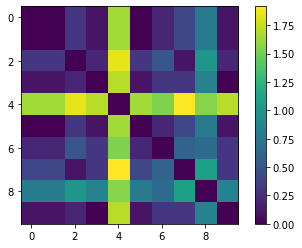

In [7]:
show_stability(res["final_locs_3D"])